# Исследование компьютерных игр и факторов, влияющих на их успешность

## 1 Описание проекта

**Датафрейм:** исторические данные до 2016г. о продажах игр, оценки пользователей и экспертов, жанров и платформ

**Задача:** изучить данные с целью выявления определяющих успешность игры закономерностей, что позволит определить потенциально популярный продукт и спланировать рекламные кампании.

**Описание данных:**

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**План работы:**
* Обзор данных
* Предобработка данных
* Анализ данных для ответа на поставленные вопросы
* Портрет пользователя трех регионов
* Проверка гипотез
* Выводы

## 2 Изучение общей информации

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

#откроем файл и выведем на экран первые 20 строк, чтобы ознакомится с данными
data = pd.read_csv('C:/Users/Yulia/Desktop/Yandex Practicum/Проекты/5- Сборный 1 (комп игры)/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [2]:
#ознакомимся с общей информацией по файлу
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод:** в полученном датасете 11 столбцов и 16715 строк. В столбцах Name, Year_of_Release, Genre, Critic_score, User_Score, Rating есть пропуски в данных, посмотрим на это на этапе предобработки данных. Также типы данных в Year_of_Release и User_Score некорректы, исправим это на этапе предобработки данных. 

## 3 Предобработка данных

In [3]:
#приведем названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()

Приведем столбец 'year_of_release' к типу данных Int, так как года это целые числа.

In [4]:
#заменим тип данных
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [5]:
#посмотрим на уникальные значения столбца 'user_score'
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

In [6]:
#найдем количество строк со значением 'tbd'
len(data[data['user_score'] == 'tbd'])

2424

Значение 'tbd' - to be decided означает, что рейтинг для этой игры еще не выставлен. Логично заменить такие значения на пропуски. Приведем столбец 'user_score' к числовому типу данных float с заменой 'tbd' на NaN.

In [7]:
#заменим тип данных
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [8]:
#посмотрим на пропуски в данных
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [9]:
#посмотрим на долю пропусков в столбцах 'name', 'year_of_release' и 'genre'
len(data[(data['name'].isna()) | (data['year_of_release'].isna()) | (data['genre'].isna())]) / len(data['name'])

0.016212982351181574

Логичной замены для пропусков в столбцах 'name', 'year_of_release' и 'genre' нет. Так как строки с пропусками в этих столбцах представляют собой всего 1,6% данных, было принято решение эти строки удалить.

In [10]:
#удалим строки с пропусками в 'name', 'year_of_release' и 'genre'
data = data.dropna(subset=['name', 'year_of_release', 'genre'])

Проверим, как количество пропусков в столбцах 'user_score', 'critic_score' и 'rating' распределено по годам, чтобы понять, есть ли между ними какая-нибудь зависимость.

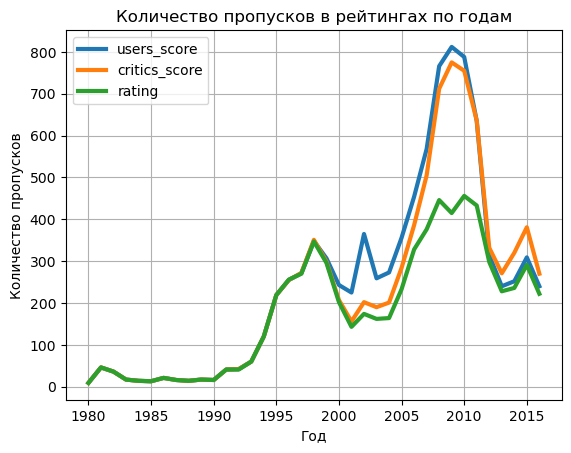

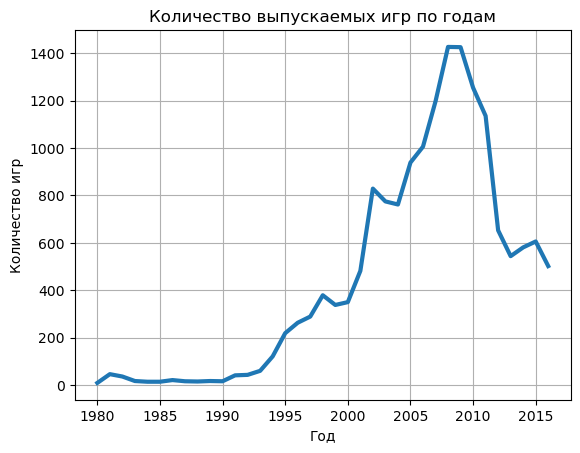

In [11]:
#создадим функцию создающую списки с количеством пропусков  по годам в 'user_score', 'critic_score' и 'rating'
def nan_count(list, column):
    for y in data['year_of_release'].sort_values().unique():
        list.append(len(data[(data['year_of_release'] == y) & (data[column].isna())]))
    return list

years = data['year_of_release'].sort_values().unique()
user_count = []
critic_count = []
rating_count = []
nan_count(user_count, 'user_score')
nan_count(critic_count, 'critic_score')
nan_count(rating_count, 'rating')

#соберем датафрейм с количеством пропусков
dict = {'years_of_release': years, 'users_score': user_count, 'critics_score': critic_count, 'rating': rating_count}
df = pd.DataFrame(dict)

#посторим график количества пропусков в рейтингах по годам
df.plot(x='years_of_release', linewidth = 3, grid = True, title = 'Количество пропусков в рейтингах по годам', ylabel='Количество пропусков', xlabel='Год')
plt.show()
#построим график количества выпускаемых игр по годам
data.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(linewidth = 3, grid = True, title ='Количество выпускаемых игр по годам', ylabel = 'Количество игр', xlabel='Год', legend=False)
plt.show()

Как видно на первом графике, количество пропусков в рейтингах от юзеров, критиков и ESRB полностью совпадает до 1998 года. Далее данные немного разнятся, но при этом распределение графиков совпадает. Распределение пропусков в рейтингах также совпадает и с распределением количества выпускаемых игр, что видно из второго графика. Это позволяет сделать вывод о том, что пропуски в данных не являются ошибкой и их наличее скорее всего связано с тем, что определенное количество игр с 1980 по 2016гг не получило рейтингов - возможно игра оказалась не достаточно популярной, не получила широкой огласки, либо производитель не позаботился о рейтингах, ведь, например, ESRB это организация, за членство в которой нужно платить взносы, для того, чтобы у производителя была возможность запросить рейтинг на свою игру. В связи с этим, было принято решение пропуски в столбцах 'user_score', 'critic_score' и 'rating' оставить. 



In [12]:
#проверим данные на явные дубликаты
data.duplicated().sum()

0

In [13]:
#проверим столбец 'genre' на наличие неявных дубликатов
data['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

In [14]:
#проверим столбец 'platform' на наличие неявных дубликатов
data['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [15]:
#посморим на значения столбца 'rating'
data['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

В данных представлены следующие категории: 
- **E** - Подходит для всех возрастных категорий.
- **T** - Подходит для лиц старше 13 лет.
- **M** - Подходит для лиц старше 17 лет.
- **E10+** - Подходит для лиц старше 10 лет. 
- **EC** - Для детей младшего возраста. 
- **K-A** - Для детей. В 1998 году был переименован в Е – для всех возрастов, а также чуть позже был добавлен рейтинг Е10+.
- **AO** - Подходит для взрослых старше 18 лет. 
- **RP** - Категория ещё не присвоена.

В целях дальнейшего анализа данных было решено категорию K-A переименовать в E10+ (в соответствии с более новой системой рейтингов), а данные с категориями ЕС, АО, RP удалить, так как они нерепрезантативны.

In [16]:
#переименуем категорию K-A в E10+
data['rating'] = data['rating'].replace('K-A', 'E10+')

In [17]:
#удалим строки с рейтингами ЕС, АО, RP
data = data.query('rating != ["EC", "AO", "RP"]')

Посмотрим на числовое описание для числовых столбцов таблицы - 'na_sales', 'eu_sales', 'jp_sales', 'other_sales':

In [18]:
data['na_sales'].describe()

count    16434.000000
mean         0.264003
std          0.818581
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64

In [19]:
data['eu_sales'].describe()

count    16434.000000
mean         0.145974
std          0.506848
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64

In [20]:
data['jp_sales'].describe()

count    16434.000000
mean         0.078535
std          0.311189
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64

In [21]:
data['other_sales'].describe()

count    16434.00000
mean         0.04761
std          0.18806
min          0.00000
25%          0.00000
50%          0.01000
75%          0.03000
max         10.57000
Name: other_sales, dtype: float64

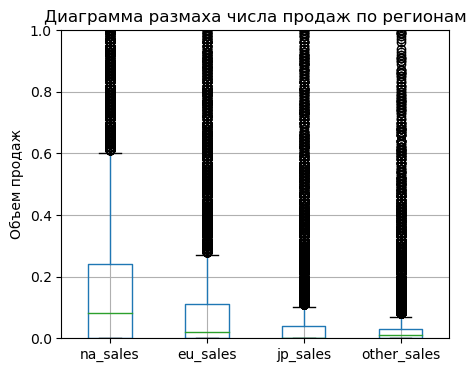

In [22]:
#посторим диаграмму размаха для этих столбцов
data.boxplot(column=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], figsize=(5,4))
plt.ylim(0,1)
plt.ylabel('Объем продаж')
plt.title('Диаграмма размаха числа продаж по регионам')
plt.show()

Как видно из числового описания и диаграммы размаха, разброс данных для числовых столбцов очень большой: na_sales от 0 до 41.36млн, eu_sales от 0 до 28,96млн, jp_sales от 0 до 10,22млн, other_sales от 0 до 10,57млн. При этом большая часть значений попадает в диапазон: na_sales до 0,6млн, eu_sales до 0,275млн, jp_sales до 0,1млн, other_sales до 0,075. 

In [23]:
#посчитайем суммарные продажи во всех регионах и запишим их в 'total_sales'
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

**Вывод:**

В ходе работы над подготовкой данных были выполнены следующие шаги:
- привели названия столбцов к нижнему регистру
- изменили тип данных int на для year_of_release и float для user_score
- заменили значения tbd в user_score на NaN
- удалили пропуски в столбцах 'name', 'year_of_release' и 'genre'
- проанализировали пропуски в столбцах 'user_score', 'critic_score' и 'rating'
- проверили данные на явные и неявные дубликаты. Дубликатов выявлено не было
- проверили значения столбца 'rating' и избавились от нерепрезантативных категорий
- посмотрели на числовые столбцы таблицы
- добавили столбец 'total_sales' с суммарными продажами во всех регионах

## 4 Исследовательский анализ данных

### Анализ количества выпускаемых игр 

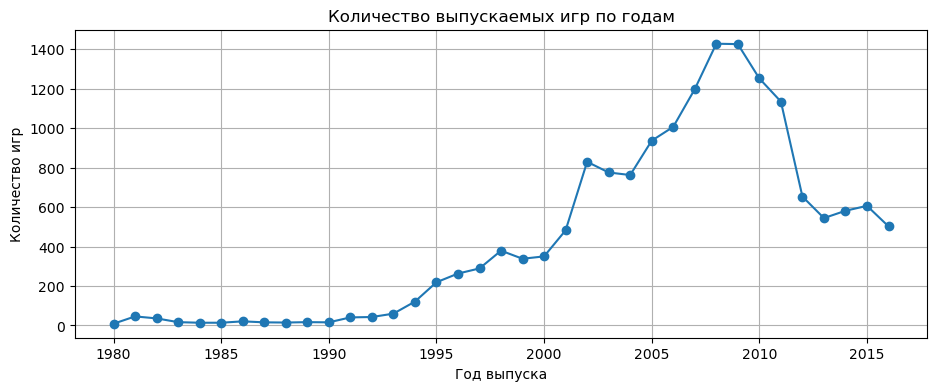

In [24]:
#построим график количества выпускаемых игр по годам
(data.pivot_table(index='year_of_release', values='name', aggfunc='count').
plot(grid=True, style='o-', figsize=(11, 4), ylabel='Количество игр', xlabel='Год выпуска', legend=False, title='Количество выпускаемых игр по годам')
)
plt.show()

**Вывод:** Как видно на графике, до 1995г выпускалось менее 200 игр в год. С 1995 количество игр постепенно начинает расти, самое большое количество выпущеных игр приходится на 2008 и 2009гг, с 2010г. число выпускаемых игр снова начинает уменьшаться.

Развитие рынка компьютерных игр идет в ногу с развитием технологий: 1996г - переход на 3D, 1997г - рассвет сетевых и онлайн-игр, 2000г - выход приставки PlayStation 2(на сегодняшний день эта приставка остаётся самой популярной на свете), 2003г - появление Facebook и развитие рынка игр в социальных сетях, 2005г - выпуск консолей 7-ого поколения, 2008г - появляются крупные сервисы по продаже мобильных игр: App Store и Android Market, что в разы увеличило продажи и подстегнуло развитие мобильных видеоигр. Спад рынка с 2010г. скорее всего связан с финансовым кризисом - многие компании закрылись, акции издательств упали в цене, в связи с финансовыми потерями компаниям пришлось сокращать расходы на разработку. Кризис надолго повлиял на игровую индуструю, 2012г назвали самым тяжёлым для розничных продаж.

В связи с тем, что рынок игр начал активно развиваться с 1995г, для дальнейшего анализа будут взяты данные только за 1995-2016гг. 

### Анализ игровых платформ

In [25]:
#найдем платформы с наибольшими суммарными продажами
(data[data['year_of_release'] >= 1995]
.pivot_table(index='platform', values='total_sales', aggfunc='sum')
.sort_values(by='total_sales', ascending=False)
.reset_index()
.head(10)
)

,platform,total_sales
0,PS2,1233.32
1,X360,961.24
2,PS3,931.34
3,Wii,890.52
4,DS,802.11
5,PS,721.55
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


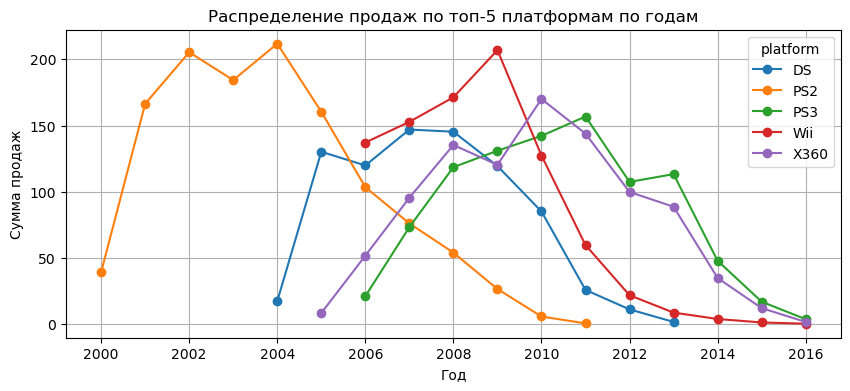

In [26]:
#построим график распределения продаж по топ-5 платформам по годам
(data[(data['platform'].isin(['PS2', 'X360', 'PS3', 'Wii', 'DS'])) & (data['year_of_release'] >= 1995)]
 .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
 .plot(figsize=(10,4), style='o-', grid=True, xlabel='Год', ylabel='Сумма продаж', title='Распределение продаж по топ-5 платформам по годам')
)
plt.show()

**Вывод:** В период за 1995-2016гг самыми прибыльными оказались платформы - "PS2", "X360", "PS3", "Wii", "DS". Как видно из графика распределения продаж по годам, платформа существует на рынке в среднем 10 лет.

В связи с тем, что рынок компьютерных игр очень динамично развивающийся рынок, новые консоли выходят каждые 2-3 года, для дальнейшего анализа выберем актуальным периодом для исследования данные за 2014-2016г.

In [27]:
#посмотрим на продажи разных платформ за 2014-2016г
(data[data['year_of_release'] >= 2014]
 .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
 )

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


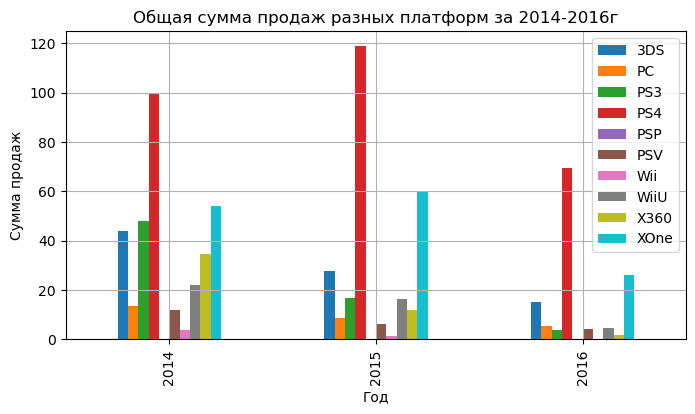

In [28]:
#построим график продаж по платформам за 2014-2016гг
(data[data['year_of_release'] >= 2014]
 .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
 .plot(kind='bar', figsize=(8,4), grid=True, xlabel='Год', ylabel='Сумма продаж', title='Общая сумма продаж разных платформ за 2014-2016г')
)
plt.legend(fontsize=10)
plt.show()

**Вывод:** Как видно на графике лидерами продаж за 2014-2016г являются PS4, XOne и 3DS. Платформа 3DS вышла в 2011г, а PS4 и XOne в 2013г, значит в соответствии со средним циклом жизни платформ они останутся на рынке до 2021-2023г. Однако, необходимо отметить, что в 2016г продажи по всем трем платформам падают, при этом нужно брать в расчет то, что данные за 2016г могут быть неполными. Спад может быть связан также с тем, что в 2016г было выпущено меньше игр, чем в 2015г. 

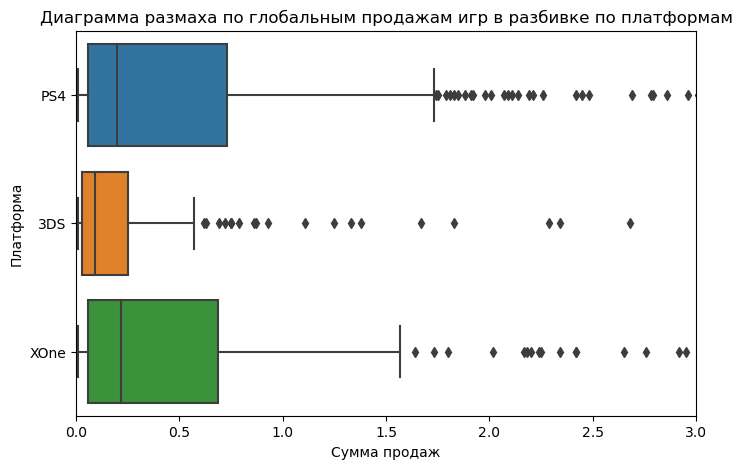

In [29]:
#построим диаграмму размаха по глобальным продажам игр в разбивке по платформам
data_boxplot = data[(data['platform'] == 'PS4') | (data['platform'] == 'XOne') | (data['platform'] == '3DS') & (data['year_of_release'] >= 2014)]
fig, ax = plt.subplots(1, figsize=(8, 5))
sns.boxplot(x=data_boxplot['total_sales'], y=data_boxplot['platform'])
plt.xlim(0,3)
plt.title('Диаграмма размаха по глобальным продажам игр в разбивке по платформам')
plt.xlabel('Сумма продаж')
plt.ylabel('Платформа')
plt.show()

**Вывод:** На графике видно, что 3DS отстает по продажам от PS4 и XOne. К тому же разброс значений для 3DS меньше, чем разброс у PS4 и XOne, то есть в среднем игры для 3DS продаются более менее одинаково и на рынке не появлялось большого количество популярных игр для этой платформы. Интересно отметить, что в среднем игры на PS4 и XOne продаются в почти одинаковых количествах, однако как мы считали ранее, объем продаж игр на PS4 за 2014-2016г в 2 раза выше продаж на XOne. Это означает, что у PS4 есть несколько очень успешных или эксклюзивных игр, которые сильно повлияли на общий объем продаж.

In [30]:
#посмотрим на топ-3 игры для PS4
data[(data['platform'] == 'PS4') & (data['year_of_release'] >= 2014)].sort_values(by='total_sales', ascending=False).head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


In [31]:
#посмотрим как эти игры продавались для XOne
data.query('name == ["Call of Duty: Black Ops 3", "Grand Theft Auto V", "FIFA 16"] and platform =="XOne"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
417,FIFA 16,XOne,2015,Sports,0.89,2.12,0.00,0.24,84.0,4.4,E,3.25


**Вывод:** Если посмотреть на топ-3 игры для PS4, можно увидеть, что объем их продаж в 2 раза превышает объем продаж тех же игр для платформы XOne, что позволяет сделать вывод о том, что PS4 более популярная платформа в сравнении с XOne.

### Анализ влияния оценок пользователей и критиков на продажи игр

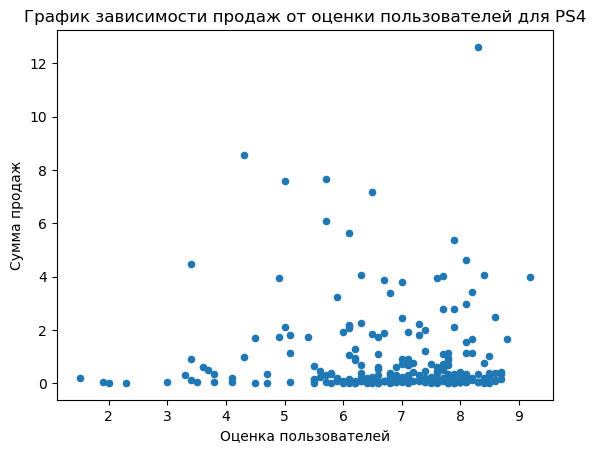

In [32]:
#построим диаграмму рассеяния для PS4 для выявления зависимости между оценкой пользователей и суммой продаж
(data[(data['platform'] == 'PS4') & (data['year_of_release'] >= 2014)]
.plot(x='user_score', y='total_sales', kind='scatter', title='График зависимости продаж от оценки пользователей для PS4', xlabel='Оценка пользователей', ylabel='Сумма продаж')
)
plt.show()

In [33]:
#посчитаем коэффициент корреляции
data[(data['platform'] == 'PS4') & (data['year_of_release'] >= 2014)]['total_sales'].corr(data['user_score'])

-0.040131589472697314

Исходя из диаграммы рассеяния и расчета коэффициента корреляции, зависимости между продажами и оценкой пользователей нет.

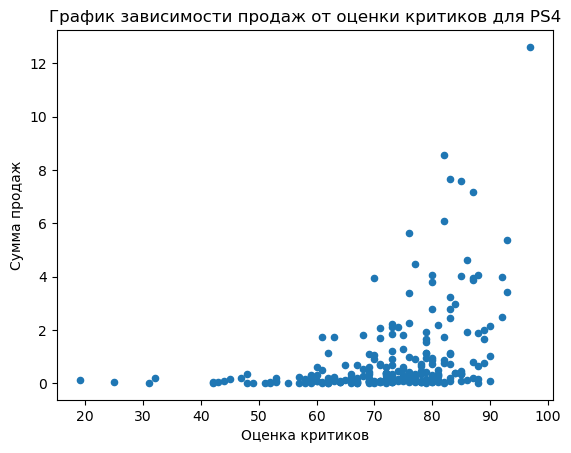

In [34]:
#построим диаграмму рассеяния для PS4 для выявления зависимости между оценкой критиков и суммой продаж
(data[(data['platform'] == 'PS4') & (data['year_of_release'] >= 2014)]
 .plot(x='critic_score', y='total_sales', kind='scatter', title='График зависимости продаж от оценки критиков для PS4', xlabel='Оценка критиков', ylabel='Сумма продаж')
)
plt.show()

In [35]:
#посчитаем коэффициент корреляции
data[(data['platform'] == 'PS4') & (data['year_of_release'] >= 2014)]['total_sales'].corr(data['critic_score'])

0.402661410681041

Исходя из диаграммы рассеяния и расчета коэффициента корреляции, определенная взяаимосвязь между оценкой критиков и продажами есть. Оценка критиков оказалась весомее оценки пользователей.

Посмотрим на ситуацию с другими платформами:

In [36]:
#посчитаем коэффициент корреляции (оценка пользователей) для XOne
data[(data['platform'] == 'XOne') & (data['year_of_release'] >= 2014)]['total_sales'].corr(data['user_score'])

-0.07038392806475816

In [37]:
#посчитаем коэффициент корреляции (оценка критиков) для XOne
data[(data['platform'] == 'XOne') & (data['year_of_release'] >= 2014)]['total_sales'].corr(data['critic_score'])

0.4286769437033319

In [38]:
#посчитаем коэффициент корреляции (оценка пользователей) для 3DS
data[(data['platform'] == '3DS') & (data['year_of_release'] >= 2014)]['total_sales'].corr(data['user_score'])

0.2151932718527028

In [39]:
#посчитаем коэффициент корреляции (оценка критиков) для 3DS
data[(data['platform'] == '3DS') & (data['year_of_release'] >= 2014)]['total_sales'].corr(data['critic_score'])

0.31411749286905094

**Вывод:** Из расчетов коэффициента корреляции для XOne и 3DS можно сделать аналогичные выводы - явной связи между оценками пользователей/критиков и продажами нет. При этом оценка критиков имеет большее значение, чем пользовательская оценка. Бывает, что игра имеет высокий рейтинг, но не оказывается популярной, потому что она оказывается слишком сложной для широкого круга пользователей или рассчитана на клиентов с определенными интересами.

### Анализ распределения игр по жанрам

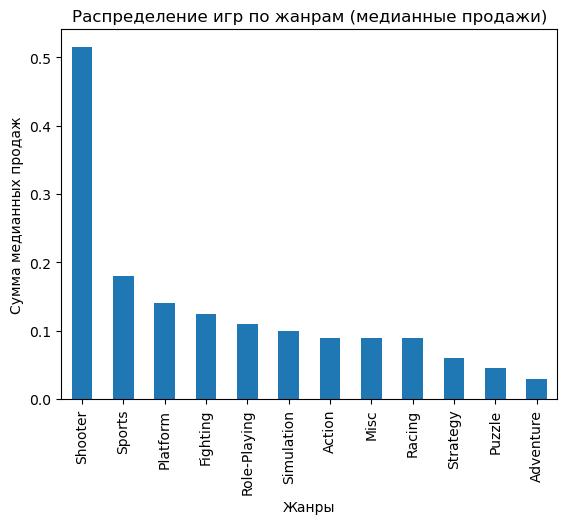

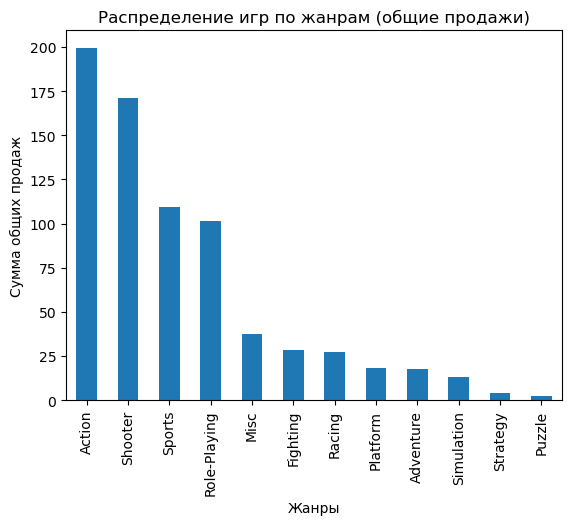

In [40]:
#посмотрим на распределение игр по жанрам
(data[data['year_of_release'] >= 2014]
 .pivot_table(index='genre', values='total_sales', aggfunc='median')
 .sort_values(by='total_sales', ascending=False)
 .plot(kind='bar', title='Распределение игр по жанрам (медианные продажи)', xlabel='Жанры', ylabel='Сумма медианных продаж', legend=False )
)
plt.show()

(data[data['year_of_release'] >= 2014]
 .pivot_table(index='genre', values='total_sales', aggfunc='sum')
 .sort_values(by='total_sales', ascending=False)
 .plot(kind='bar', title='Распределение игр по жанрам (общие продажи)', xlabel='Жанры', ylabel='Сумма общих продаж', legend=False )
)
plt.show()

**Вывод:** самыми прибыльными являются жанры с наибольшими медианными продажами - Shooter, Sports, Platforms, а жанрами с самыми низкими продажами являются Strategy, Puzzle и Adventure, что неудивительно, ведь последние три жанра рассчитаны на игроков, любящих размышлять и решать головоломки, тогда как первые три жанра носят чисто развлекательный характер и поэтому более популярны среди широких масс населения. 

## 5 Портрет пользователя каждого региона

### Выявление самых популярных платформ (топ-5) по региону

In [41]:
#найдем топ-5 платформ для региона NA
(data[data['year_of_release'] >= 2014]
 .groupby('platform')['na_sales'].agg('sum')
 .sort_values(ascending=False)
 .head(5)
)

platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64

In [42]:
#создадим функцию для категоризации данных 
def top_values(value, list):
    if value in list:
        return value
    return 'others'

#применим функцию для объединения платформ не попавших в топ-5 NA в категорию 'others'
top_na_platforms = ['PS4', 'XOne', 'X360', '3DS', 'PS3']
data['na_top_platforms'] = data['platform'].apply(top_values, list=top_na_platforms)


In [43]:
#найдем топ-5 платформ для региона EU
(data[data['year_of_release'] >= 2014]
 .groupby('platform')['eu_sales'].agg('sum')
 .sort_values(ascending=False)
 .head(5)
)

platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64

In [44]:
#применим функцию для объединения платформ не попавших в топ-5 EU в категорию 'others'
top_eu_platforms = ['PS4', 'XOne', 'PS3', 'PC', '3DS']
data['eu_top_platforms'] = data['platform'].apply(top_values, list=top_eu_platforms)

In [45]:
#найдем топ-5 платформ для региона JP
(data[data['year_of_release'] >= 2014]
 .groupby('platform')['jp_sales'].agg('sum')
 .sort_values(ascending=False)
 .head(5)
)

platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64

In [46]:
#применим функцию для объединения платформ не попавших в топ-5 JP в категорию 'others'
top_jp_platforms = ['3DS','PS4', 'PSV', 'PS3', 'WiiU']
data['jp_top_platforms'] = data['platform'].apply(top_values, list=top_jp_platforms)

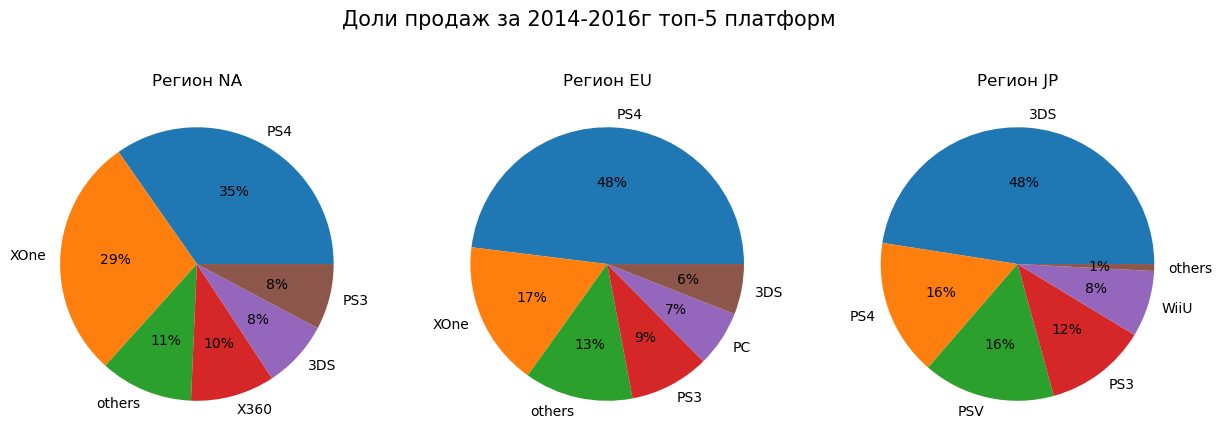

In [50]:
#созададим график с долями продаж топ-5 платформ
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,10))
fig.suptitle('Доли продаж за 2014-2016г топ-5 платформ', y=0.75, fontsize=15)

#для NA
data_na_platform = (data[data['year_of_release'] >= 2014]
 .groupby('na_top_platforms')['na_sales'].agg('sum')
 .sort_values(ascending=False)
          )
ax1.pie(data_na_platform, autopct='%1.0f%%', labels=data_na_platform.reset_index()['na_top_platforms'])  
ax1.set_title('Регион NA')

#для EU
data_eu_platform = (data[data['year_of_release'] >= 2014]
 .groupby('eu_top_platforms')['eu_sales'].agg('sum')
 .sort_values(ascending=False)
          )
ax2.pie(data_eu_platform, autopct='%1.0f%%', labels=data_eu_platform.reset_index()['eu_top_platforms'])
ax2.set_title('Регион EU')

#для JP
data_jp_platform = (data[data['year_of_release'] >= 2014]
 .groupby('jp_top_platforms')['jp_sales'].agg('sum')
 .sort_values(ascending=False)
          )
ax3.pie(data_jp_platform, autopct='%1.0f%%', labels=data_jp_platform.reset_index()['jp_top_platforms'])
ax3.set_title('Регион JP')

plt.show()

**Вывод:** Топ-5 платформ по регионам:
- NA: 'PS4', 'XOne', 'X360', '3DS', 'PS3'
- EU: 'PS4', 'XOne', 'PS3', 'PC', '3DS'
- JP: '3DS','PS4', 'PSV', 'PS3', 'WiiU'

Как видим из графиков, PS4 является абсолютным лидером на рынках NA и EU, беря на себя 35% и 48% продаж в этих регионах. Ее главным конкурентом является консоль XOne, на которую приходятся 29% и 17% продаж в регионах NA и EU. XOne имеет более сильную позицию в регионе NA, что неудивительно, так как консоль создана американской компанией Microsoft. Однако на рынке EU XOne сильно отстает от PS4, что означает, что у XOne есть определенные перспективы роста на рынке EU. Оставшиеся консоли, попавшие в список топ-5, на обоих рынках занимают не более 10% продаж каждая. Также необходимо отметить, что на рынках NA и EU представлен широкий ассортимент консолей -  на продажи игр для консолей, не попавших в список топ-5, приходится 11% и 13% доли соответствующих рынков. Рынок JP сильно отличается от рынков NA и EU. Лидером продаж является платформа 3DS, занимающая 48% рынка. 44% рынка приходятся на PS4, PS3 и PSV, что логично, ведь Nintendo и Sony являются японскими компаниями. Оставшиеся 8% занимает консоль WiiU, тоже созданая компанией Nintendo. К тому же, Nintendo 3DS и PSV обладают преимуществом  мобильности, что важно в Японии, где многие играют по дороге на работу и обратно.  Другие платформы почти не представлены в регионе JP.  

### Выявление самых популярных жанров (топ-5) по регионам 

In [52]:
#найдем топ-5 популярных жанров в регионе NA
(data[data['year_of_release'] >= 2014]
 .groupby('genre')['na_sales'].agg('sum')
 .sort_values(ascending=False)
 .head(5)
)

genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: na_sales, dtype: float64

In [53]:
#найдем топ-5 популярных жанров в регионе EU
(data[data['year_of_release'] >= 2014]
 .groupby('genre')['eu_sales'].agg('sum')
 .sort_values(ascending=False)
 .head(5)
)

genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64

In [54]:
#найдем топ-5 популярных жанров в регионе JP
(data[data['year_of_release'] >= 2014]
 .groupby('genre')['jp_sales'].agg('sum')
 .sort_values(ascending=False)
 .head(5)
)

genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: jp_sales, dtype: float64

In [55]:
#применим функцию для объединения жанров не попавших в топ-5 в категорию 'others'
top_na_genre = ['Shooter', 'Action', 'Sports', 'Role-Playing', 'Misc']
top_eu_genre = ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Racing']
top_jp_genre = ['Role-Playing', 'Action', 'Fighting', 'Misc', 'Shooter' ]
data['na_top_genre'] = data['genre'].apply(top_values, list=top_na_genre)
data['eu_top_genre'] = data['genre'].apply(top_values, list=top_eu_genre)
data['jp_top_genre'] = data['genre'].apply(top_values, list=top_jp_genre)

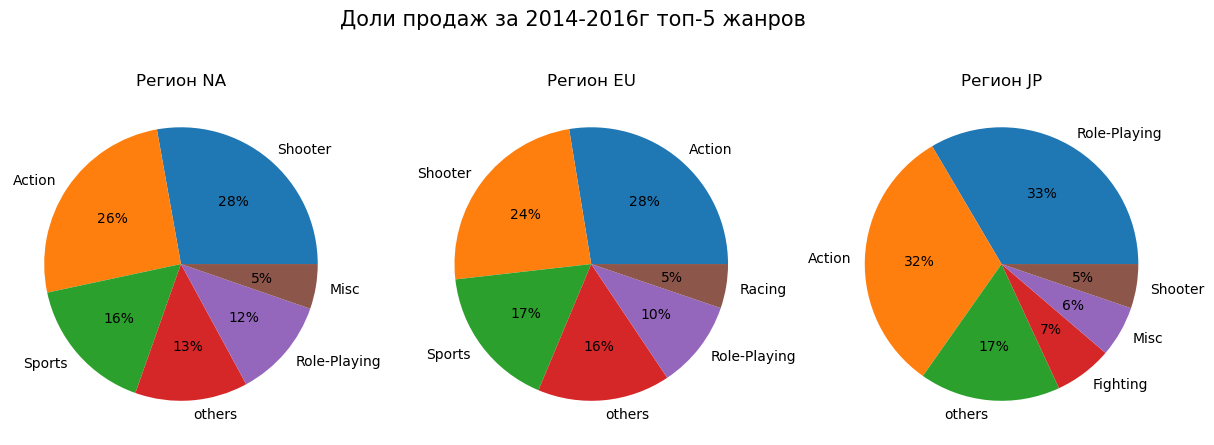

In [56]:
#созададим график с долями продаж топ-5 жанров
fig, (ax4, ax5, ax6) = plt.subplots(1, 3, figsize=(15,10))
fig.suptitle('Доли продаж за 2014-2016г топ-5 жанров', y=0.75, fontsize=15)

#для NA
data_na_genre = (data[data['year_of_release'] >= 2014]
 .groupby('na_top_genre')['na_sales'].agg('sum')
 .sort_values(ascending=False)
 )

ax4.pie(data_na_genre, autopct='%1.0f%%', labels=data_na_genre.reset_index()['na_top_genre'] )
ax4.set_title('Регион NA')

#созададим график с долями продаж топ-5 жанров для EU
data_eu_genre = (data[data['year_of_release'] >= 2014]
 .groupby('eu_top_genre')['eu_sales'].agg('sum')
 .sort_values(ascending=False)
 )
ax5.pie(data_eu_genre, autopct='%1.0f%%', labels=data_eu_genre.reset_index()['eu_top_genre'] )
ax5.set_title('Регион EU')

#созададим график с долями продаж топ-5 жанров для JP
data_jp_genre = (data[data['year_of_release'] >= 2014]
 .groupby('jp_top_genre')['jp_sales'].agg('sum')
 .sort_values(ascending=False)
)
ax6.pie(data_jp_genre, autopct='%1.0f%%', labels=data_jp_genre.reset_index()['jp_top_genre'] )
ax6.set_title('Регион JP')

plt.show()

**Вывод:** Как видно из графиков, пользователи NA и EU предпочитают одинаковые жанры - в топе жанры Action, Shooter и Sports. Это быстрые, несложные, динамичные, развлекательные игры, соответствующие западной культуре и вполне логично, что они занимают большую часть рынка. В топ-5 жанров NA и EU также попали Role-Playing, Racing и Misc. Рынок JP опять же довольно сильно отличается от NA и EU. В лидерах находится жанр Role-Playing, так как японцы предпочитают более сложные и медленные игры с историей и сюжетом. Большую часть рынка занимают также и игры Action, которые оказались популярны во всех регионах. В топ-5 на регионе JP также попали Fighting, Misc и Shooter. 

### Влияние рейтинга ESRB на продажи по регионам

In [57]:
#заполним пропуски в столбцах 'rating' значением 'no rating'
data['rating'] = data['rating'].fillna('no rating')

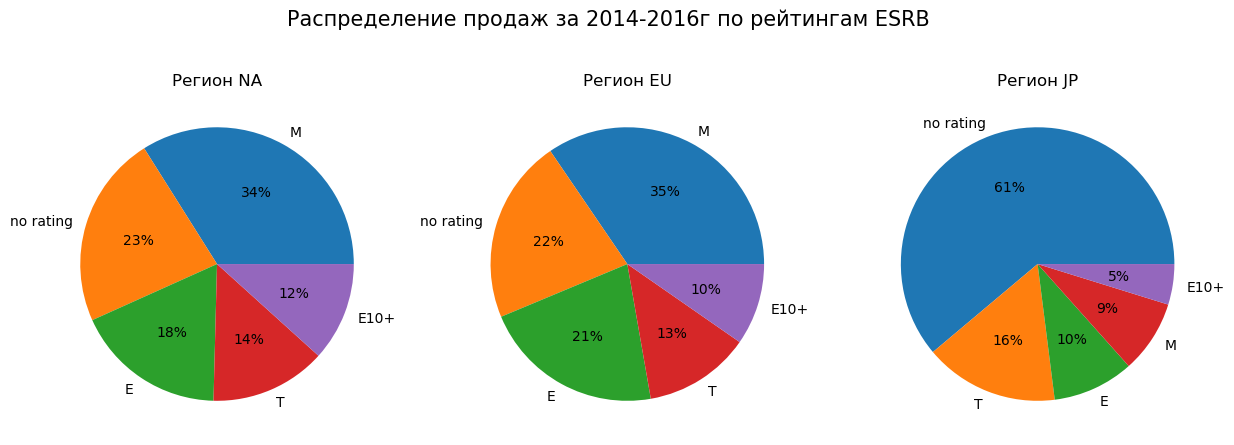

In [59]:
#посмотрим на распределение продаж по рейтигу 
fig, (ax7, ax8, ax9) = plt.subplots(1, 3, figsize=(15,10))
fig.suptitle('Распределение продаж за 2014-2016г по рейтингам ESRB', y=0.75, fontsize=15)

#в регионе NA
data_na_esrb = (data[data['year_of_release'] >= 2014]
 .groupby('rating')['na_sales'].agg('sum')
 .sort_values(ascending=False)
)

ax7.pie(data_na_esrb, autopct='%1.0f%%', labels=data_na_esrb.reset_index()['rating'] )
ax7.set_title('Регион NA')

#в регионе EU
data_eu_esrb = (data[data['year_of_release'] >= 2014]
 .groupby('rating')['eu_sales'].agg('sum')
 .sort_values(ascending=False)
 )

ax8.pie(data_eu_esrb, autopct='%1.0f%%', labels=data_eu_esrb.reset_index()['rating'] )
ax8.set_title('Регион EU')

#в регионе JP
data_jp_esrb = (data[data['year_of_release'] >= 2014]
 .groupby('rating')['jp_sales'].agg('sum')
 .sort_values(ascending=False)
)

ax9.pie(data_jp_esrb, autopct='%1.0f%%', labels=data_jp_esrb.reset_index()['rating'] )
ax9.set_title('Регион JP')

plt.show()

**Вывод:**  Регионы NA и EU снова показывают похоже результаты - распределение продаж по рейтингам почти идентично. В регионе JP большая часть продаж приходится на игры без рейтинга. Это объясняется тем, что организвация ESRB занимается рейтингами игр для Амеркики, Канады и Мексики, в Европе и Японии есть свои аналогичные организации, занимающиеся рейтингами игр. График распределения продаж по рейтингам в JP позволяет сделать вывод, что на рынке большое количество специфических и популярных исключительно в Японии игр, которые не получили распространения в Америке и соответственно не получили рейтинг ESRB. Соответственно, можно сказать, что рейтинг ESRB не влияет на продажи в регионе JP. Рейтинг имеет значение в NA и EU, рынки и пользователи которых очень похожи, однако нельзя сказать, что продажи зависят от отпределенной категории рейтинга или наличия рейтинга в целом, так как это больше вопрос количества пользователей в каждой категории, их покупательской способности, количества игр в каждой категории и т.п. 

Таким образом, говоря о портрете пользователя в каждом регионе, можно сказать следущее:
- Пользователи NA и EU предпочитают консоли PlayStation и XBox и чаще всего играют в быстрые, несложные, развлекательные игры жанров Action, Shooter и Sports
- Пользователи JP предпочитают мобильную консоль 3DS и консоли PlayStation и чаще предпочитают играть в более сложные и долгие игры с сюжетом, как в жанре Role-Playing, но также любят и игры Action. Также в регионе распространены уникальные для него игры, которые не получили популярности в других регионах. 

## 6 Проверка гипотез

### Проверка гипотезы о равенстве среднего пользовательского рейтинга платформ Xbox One и PC 

Нулевая гипотеза - это гипотеза об отсутствии различий, а альтернативная гипотеза - это гипотеза о значимости различий. В соответствии с этим сформулируем следующие гипотезы : 

Нулевая гипотеза: пользовательский рейтинг (user_score) платформы Xbox One равен пользовательскому рейтингу (user_score) платформы PC.

Альтернативная гипотеза : пользовательский рейтинг (user_score) платформы Xbox One не равен пользовательскому рейтингу (user_score) платформы PC.

Критерием уровня значимости выберем значение 5%, так как в большинстве случаев такой вероятности достаточно, чтобы отвергнуть нулевую гипотезу.  


In [60]:
#найдем выборки и их размеры
array_xbox = data[(data['year_of_release'] >= 2014) & (data['platform'] == 'XOne')]['user_score']
array_pc = data[(data['year_of_release'] >= 2014) & (data['platform'] == 'PC')]['user_score']

print(array_xbox.count())
print(array_pc.count())

165
122


In [61]:
#проведем ttest для проверки гипотезы
alpha = 0.05
result = st.ttest_ind(array_xbox, array_pc, equal_var=False, nan_policy='omit')
print('p-значение:', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.11601398086668943
Не получилось отвергнуть нулевую гипотезу


### Проверка гипотезы о равенстве средних пользовательских рейтингов жанров Action и Sports 

Нулевая гипотеза: пользовательский рейтинг (user_score) жанра Action равен пользовательскому рейтингу (user_score) жанра Sports.

Альтернативная гипотеза : пользовательский рейтинг (user_score) жанра Action не равен пользовательскому рейтингу (user_score) жанра Sports.

Критерием уровня значимости выберем значение 5%

In [62]:
#найдем выборки и их размеры
array_action = data[(data['year_of_release'] >= 2014) & (data['genre'] == 'Action')]['user_score']
array_sports = data[(data['year_of_release'] >= 2014) & (data['genre'] == 'Sports')]['user_score']

print(array_action.count())
print(array_sports.count())

297
127


In [63]:
#проведем ttest для проверки гипотезы
alpha = 0.05
result = st.ttest_ind(array_action, array_sports, equal_var=False, nan_policy='omit')
print('p-значение:', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.182555038264477e-14
Отвергаем нулевую гипотезу


**Вывод:** 

Нулевая гипотеза - это гипотеза об отсутствии различий, а альтернативная гипотеза - это гипотеза о значимости различий. В соответствии с этим были сформулированы гипотезы.  

Критерием уровня значимости выберем значение 5%, так как в большинстве случаев такой вероятности достаточно, чтобы отвергнуть нулевую гипотезу.

Используем метод ttest_ind, так как необходимо проверить гипотезы о равенстве среднего двух независимых генеральных совокупностей по взятым из них выборкам. 

1. Гипотезу о равенстве среднего пользовательского рейтинга платформ Xbox One и PC отвергнуть не получилось. С 95% доверительной вероятностью можно констатировать, что различия между пользовательскими рейтингами для Xbox One и PC не являются статистически значимыми.

2. Гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports отвергли. С 95% доверительной вероятностью можно констатировать, что пользовательский рейтинг жанра Action отличается от рейтинга жанра Sports.

## 7 Общий вывод

**Цель исследования:** изучить исторические данные о продажах игр, оценки пользователей и экспертов, жанров и платформ с целью выявления определяющих успешность игры закономерностей, что позволит определить потенциально популярный продукт и спланировать рекламные кампании. 

**Ход исследования:** Исторические данные о продажах игр были получены из файла /datasets/games.csv. Перед анализом была проведена предобработка данных, в ходе котрой были сделаны следующие шаги:
 * привели названия столбцов к нижнему регистру
 * изменили тип данных int на для year_of_release и float для user_score
 * заменили значения tbd в user_score на NaN
 * удалили пропуски в столбцах 'name', 'year_of_release' и 'genre'
 * проанализировали пропуски в столбцах 'user_score', 'critic_score' и 'rating'
 * проверили данные на явные и неявные дубликаты. Дубликатов выявлено не было
 * проверили значения столбца 'rating' и избавились от нерепрезантативных категорий
 * посмотрели на числовые столбцы таблицы
 * добавили столбец 'total_sales' с суммарными продажами во всех регионах
 
**Итоги исследования:** 

В результате исследования распределения игр по годам было выявлено, что рынок игр начал активно развиваться с 1995г, максимальные продажи приходятся на 2008 и 2009г, с 2010г. число выпускаемых игр снова начинает уменьшаться. Рост игровой индустрии связан с развитием технологий, индустрии игровых платформ и консолей, появления социальных сетей и сервисов продаж мобильных игр, а падение рынка скорее всего связано с финансовым кризисом 2008г. 

По итогам исследования игровых платформ было определено, что средний жизненый цикл игровой платформы составляет 10 лет. В период 2014-2016г. абсолютными лидерами являются консоли PS4 и XOne. В среднем игры для этих консолей продаются в почти одинаковых количествах, однако общий объем продаж игр на PS4 за 2014-2016г в 2 раза выше продаж на XOne. Это означает, что у PS4 более популярная платформа и у нее есть несколько очень успешных или эксклюзивных игр, которые сильно повлияли на общий объем продаж. В тройку лидеров также входит платформа 3DS.

Анализ зависимости продаж от оценки пользователей и критиков показал, что явной связи между этими оценками и продажами нет. При этом оценка критиков имеет большее значение, чем пользовательская оценка.

Анализ распределения игр по жанрам выявил, что самыми популярными оказались жанры Shooter, Sports, Platforms, а самыми непопулярными жанрами являются Strategy, Puzzle и Adventure. Это говорит о том, что в среднем пользователи предпочтают несложные и развлекательные игры. При этом самыми прибыльными жанрами оказались Action, Shooter, Sports, что говорит о том, что в жанре Action есть несколько очень успешных игр, сильно повлиявщих на общие продажи игр этого жанра. Жанры с самыми низкими продажами - Simulation, Strategy, Puzzle.

Исследование портрета пользователя в разных регионах показал, что рынки и пользователи NA и EU очень похожи, а регион JP имеет много отличий. Пользователи NA и EU предпочитают консоли PlayStation и XBox и чаще всего играют в быстрые, несложные, развлекательные игры жанров Action, Shooter и Sports.
Пользователи JP предпочитают мобильную консоль 3DS и консоли PlayStation и чаще предпочитают играть в более сложные и долгие игры с сюжетом, как в жанре Role-Playing, но также любят и игры Action. Также в регионе распространены уникальные для него игры, которые не получили популярности в других регионах. Рейтинг ESRB имеет значение для регионов NA и EU, но не влияет на рынок JP.


Также были проверены следующие гипотезы: 
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Гипотезу отвергнуть не получилось.
2. Средние пользовательские рейтинги жанров Action и Sports разные. Гипотеза подтвердилась. 


